In [1]:
from random import randint, choice
import matplotlib.pyplot as plt

In [2]:
def calc_win_percentage(wins, losses):
    return wins / (wins + losses) * 100.0
     
class Host:
    def __init__(self, num_doors=3):
        """Host initializes the game. Make all doors and hide a car.
        
        Initializes:
        ------------
        self.door_dct : dict of Doors
        self.car_door : int
            The door number which is hiding the car.
        """
        self.door_dct = {x : Door(hiding="goat", closed=1, number=x) for x in range(1, num_doors+1)}
        
        self.door_num_ls = list(self.door_dct.keys())
        
        # Hide a car behind a random door.
        self.car_door_num = randint(1, num_doors)
        self.door_dct[self.car_door_num].hiding = "car"
        
        self.unrevealed_door_nums = []
    
    def describe_door_state(self):
        """
        Host explains how many doors are open and closed and how many doors
        contain cars and goats.
        """
        print(f"[Host]")
        for door in self.door_dct.values():
            state = "closed" if door.closed else "open"
            print(f"  Door number {door.number} ({state}) is hiding a {door.hiding}.")
            
    def reveal_other_doors(self, contestant_choice, verbose=False):
        """
        Open all goat doors except contestant's choice and 1 random door.
        
        Set `self.unrevealed_door_nums`.
        
        contestant_choice : int
            Number of door which contestant thinks contains the car.
        """
        revealed_doors = self.door_num_ls.copy()
        # Can't reveal contestant's choice or the car.
        revealed_doors.remove(contestant_choice)
        if contestant_choice == self.car_door_num:
            door_to_remain_closed = choice(revealed_doors)
        else:
            door_to_remain_closed = self.car_door_num
        revealed_doors.remove(door_to_remain_closed)
        
        self.unrevealed_door_nums.append(contestant_choice)
        self.unrevealed_door_nums.append(door_to_remain_closed)
        
        # Make sure all revealed doors have goats.
        assert all(["goat" in self.door_dct[num].hiding for num in revealed_doors])
        
        for num in revealed_doors:
            this_door = self.door_dct[num]
            this_door.reveal()
        
        if verbose:
            self.describe_door_state()
            print(f"  Do you want to switch to door {door_to_remain_closed}?")
            
    def announce_end_result(self, contestant_choice, verbose=False):
        """
        Determine whether or not contestant won.
        
        Return 1 on a win, 0 otherwise.
        """
        win = 1 if contestant_choice == self.car_door_num else 0
        if verbose:
            if win:
                print(
                    f"[Host]\n"
                    f"  WE HAVE A WINNER!\n"
                )
            else:
                print(f"Sorry, bub. Better luck next time!\n")
        return win

class Contestant:
    def __init__(self):
        self.chosen_door = -1
        self.win = -1  # 1=win, 0=lose.
    
    def choose_door(self, door_num_ls, verbose=False):
        """Contestant chooses a door."""
        door_num = randint(1, len(door_num_ls))
        self.chosen_door = door_num
        if verbose:
            print(
                f"[Contestant]\n"
                f"  I choose door {door_num}."
            )
        return door_num
    
    def switch_doors(self, door_num_ls, verbose=False):
        """Change `self.chosen_door` to the other choice."""
        assert len(door_num_ls) == 2
        door_cp = door_num_ls.copy()
        door_cp.remove(self.chosen_door)
        new_door = door_cp[0]
        assert new_door != self.chosen_door
        self.chosen_door = new_door
        if verbose:
            print(
                f"[Contestant]\n"
                f"  Yes! I want to switch to door {new_door}."
            )

class Door:
    def __init__(self, hiding="goat", closed=1, number=-1):
        """
        hiding : str
            Either 'goat' or 'car'.
        closed : bool
            If True, the door is closed.
        number : int
            Which door (-1 is unassigned).
        """
        self.hiding = hiding
        self.closed = closed
        self.number = number  # -1 is unassigned.
        
    def reveal(self):
        self.closed = 0

class MontyHallGame:
    def __init__(self):
        pass
        
    def play(self, num_contestants=1, num_doors=3, switch=1, verbose=0):
        """
        Have `num_contestants` each play a game.
        Return the number of contestants who won and lost.
        
        Parameters
        ----------
        num_contestants : int
        num_doors : int
        switch : bool
        verbose : bool
               
        Returns
        -------
        (n_wins, n_losses) : 2-tuple of ints
        """
        assert num_doors >= 3
        n_wins = 0
        n_losses = 0
        for contest in range(num_contestants):
            con = Contestant()
            host = Host(num_doors=num_doors)
            
            con.chosen_door = con.choose_door(host.door_num_ls, verbose=verbose)
            host.reveal_other_doors(contestant_choice=con.chosen_door, verbose=verbose)
            if switch:
                con.switch_doors(host.unrevealed_door_nums)
            con.win = host.announce_end_result(contestant_choice=con.chosen_door, verbose=verbose)
            if con.win:
                n_wins += 1
            else:
                n_losses += 1
        return (n_wins, n_losses)
    
    def plot_barh(self, wins, losses):
        """Make `axes` with a horizontal bar graph showing wins and losses."""
        win_perc = calc_win_percentage(wins, losses)

        vict_dict = {
            'Wins' : wins,
            'Losses' : losses
        }

        y_labels = tuple(vict_dict.keys())
        x_vals = list(vict_dict.values())

        f, ax = plt.subplots()
        ax.barh(y=y_labels, width=x_vals, align='center', alpha=0.5)
        ax.set_title(
            f'Contestants who switched '
            f'(played with {num_doors} doors)'
        )
        ax.set_xlabel('Number of Games')

        props = dict(
            boxstyle='square',
            facecolor='whitesmoke',
            edgecolor='blue',
            alpha=0.8)
        _ = ax.text(
            0.6, 0.9, f'Win percentage = {win_perc:.1f}%',
            transform=ax.transAxes,
            bbox=props)

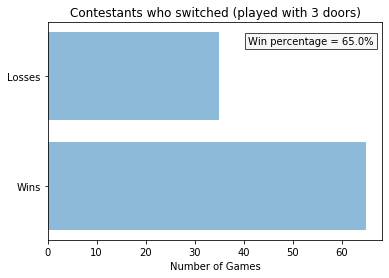

In [5]:
num_contestants = 100
num_doors = 3
switch = True
verbose = 0

mhg = MontyHallGame()
wins, losses = mhg.play(
                num_contestants=num_contestants,
                num_doors=num_doors,
                switch=switch,
                verbose=verbose)



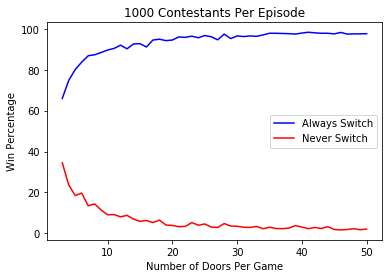

In [26]:
max_doors = 50
num_contestants = 1000  # Per episode.
switch = 0
verbose = False

mhg = MontyHallGame()

x_vals = range(3, max_doors+1)
y_vals_switch = []
y_vals_stay = []
for n_doors in x_vals:
    wins, losses = mhg.play(
                    num_contestants=num_contestants,
                    num_doors=n_doors,
                    switch=True,
                    verbose=verbose)
    win_perc = calc_win_percentage(wins, losses)
    y_vals_switch.append(win_perc)

    wins, losses = mhg.play(
                    num_contestants=num_contestants,
                    num_doors=n_doors,
                    switch=False,
                    verbose=verbose)
    win_perc = calc_win_percentage(wins, losses)
    y_vals_stay.append(win_perc)

# fig, ax = plt.subplots(nrows=2, ncols=1)
# mhg.plot_barh(wins, losses, axes=ax)

plt.plot(x_vals, y_vals_switch, label='Always Switch', color='b')
plt.plot(x_vals, y_vals_stay, label='Never Switch', color='r')
plt.legend()
plt.xlabel('Number of Doors Per Game')
# descr = 'always switching' if switch else 'never switching'
# plt.ylabel(f'Win Percentage when {descr}')
plt.ylabel('Win Percentage')
_ = plt.title(f'{num_contestants} Contestants Per Episode')